<a href="https://colab.research.google.com/github/morerule/DS6_DL/blob/main/DS6_%EB%89%B4%EC%8A%A4%EC%B9%B4%ED%85%8C%EA%B3%A0%EB%A6%AC_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98%5B%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%5D_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

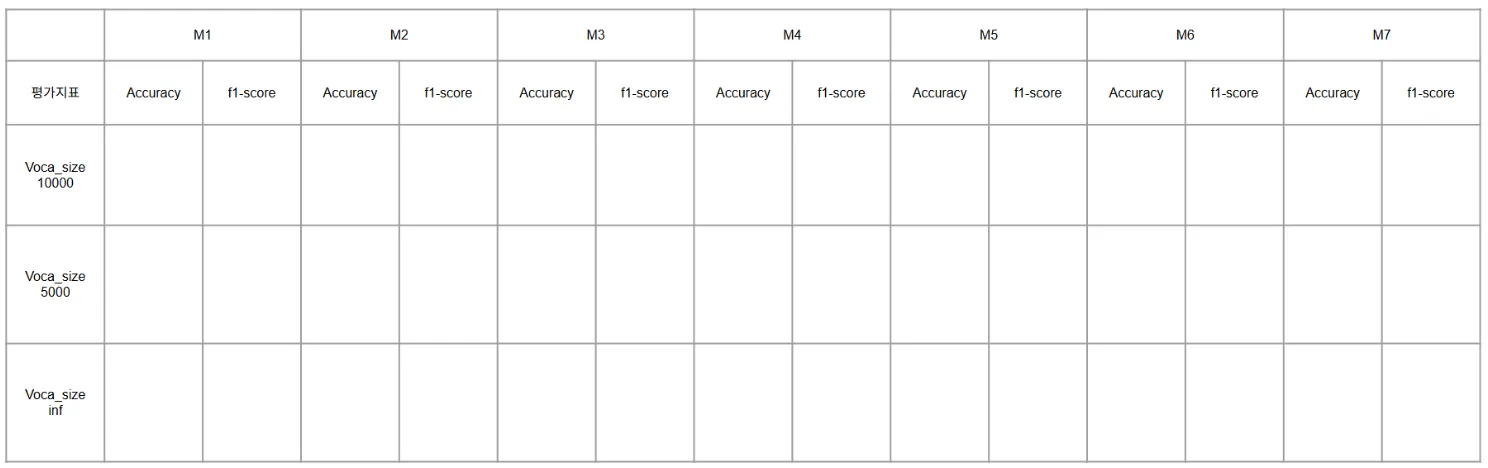

# 회고

제일좋은 모델은 LogisticRegression 이었다


#오늘 할일
### 실험 또 실험 🤯


1. 단어장 개수를 바꾸면서(10000, 5000, Nan) 8개의 ML모델을 사용해보고  accuacry와 f1-score를 비교
(표로 나타내보세요~) (벡터화는 tf-idf로 통일)

아래 모델은 예시입니다, 여러 모델을 실험해보세요

### 📊 단어장 개수별 ML 모델 성능 비교 (Accuracy / F1-score)

| Vocabulary Size | Model             | Accuracy | F1-Score |
|------------------|------------------|----------|----------|
| 10000            | LogisticRegression |          |          |
|                  | SVM                |          |          |
|                  | RandomForest       |          |          |
|                  | XGBoost            |          |          |
|                  | NaiveBayes         |          |          |
|                  | Dense              |          |          |
|                  | LightGBM           |          |          |
|                  | DecisionTree       |          |          |
| 5000             | LogisticRegression |          |          |
|                  | SVM                |          |          |
|                  | RandomForest       |          |          |
|                  | XGBoost            |          |          |
|                  | NaiveBayes         |          |          |
|                  | Dense              |          |          |
|                  | LightGBM           |          |          |
|                  | DecisionTree       |          |          |
| NaN (All words)  | LogisticRegression |          |          |
|                  | SVM                |          |          |
|                  | RandomForest       |          |          |
|                  | XGBoost            |          |          |
|                  | NaiveBayes         |          |          |
|                  | Dense              |          |          |
|                  | LightGBM           |          |          |
|                  | DecisionTree       |          |          |

2. 딥러닝과 머신런닝의 차이 비교하기
- 딥러닝 모델 1개 Dense를 이용해서 비교해보세요 평가지표 = accuacry, f1-score

In [ ]:
from tensorflow.keras.datasets import reuters
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# 데이터 준비
## index -> text
## DTM , TF-idf 학습데이터 준비

In [ ]:
# 이부분에있는 num_words를 5000과 다른방법으로 바꿔보세요~

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

In [ ]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [ ]:
index_to_word = { index+3 : word for word, index in word_index.items() }
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [ ]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [ ]:
decoded_test = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded_test.append(t)

x_test = decoded_test
print(len(x_test))

2246


In [ ]:
# 벡터화 DTM, TF-idf 방법
dtmvector = CountVectorizer()

tfidf_transformer = TfidfTransformer()

x_train_dtm = dtmvector.fit_transform(x_train)
x_test_dtm= dtmvector.transform(x_test)

x_train_tfidf = tfidf_transformer.fit_transform(x_train_dtm)
x_test_tfidf = tfidf_transformer.transform(x_test_dtm)

In [ ]:
x_train_tfidf.shape

(8982, 26506)

In [ ]:
x_test_tfidf.shape

(2246, 26506)

In [ ]:
x_train[3]

"<sos> the farmers home administration the u s agriculture department's farm lending arm could lose about seven billion dlrs in outstanding principal on its severely delinquent borrowers or about one fourth of its farm loan portfolio the general accounting office gao said in remarks prepared for delivery to the senate agriculture committee brian crowley senior associate director of gao also said that a preliminary analysis of proposed changes in fmha's financial eligibility standards indicated as many as one half of fmha borrowers who received new loans from the agency in 1986 would be ineligible under the proposed system the agency has proposed evaluating applicants' credit using a variety of financial ratios instead of relying solely on cashflow ability senate agriculture committee chairman patrick leahy d vt slammed the proposed eligibility changes telling fmha administrator vance clark at a hearing that they would mark a dramatic shift in the agency's purpose away from being farmer

# 모델 정의 및 실험

여러가지 모델을 바꾸며 실험해보세요~

In [ ]:
# RandomForest (Nan)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# 모델 정의
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

rf_model.fit(x_train_tfidf, y_train)
y_pred = rf_model.predict(x_test_tfidf)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ F1-score: {f1:.4f}")


✅ Accuracy: 0.7418
✅ F1-score: 0.4135


In [ ]:
# RandomForest (5000)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# 모델 정의
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

rf_model.fit(x_train_tfidf, y_train)
y_pred = rf_model.predict(x_test_tfidf)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ F1-score: {f1:.4f}")


✅ Accuracy: 0.7685
✅ F1-score: 0.4463


In [ ]:
# RandomForest (10000)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# 모델 정의
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

rf_model.fit(x_train_tfidf, y_train)
y_pred = rf_model.predict(x_test_tfidf)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ F1-score: {f1:.4f}")


✅ Accuracy: 0.7542
✅ F1-score: 0.4341


# Dense NN 딥러닝 모델

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, LSTM, Dense, Dropout


# 아래 Dense의 레이어를 바꿔가며 성능을 확인해봅시다

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout

print(x_train_tfidf.shape)
input_dim = x_train_tfidf.shape[1]
inputs = Input(shape=(input_dim,))

x = Dense(512, activation='relu')(inputs)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(46, activation='softmax')(x)  # 클래스 46개

dense_model = Model(inputs=inputs, outputs=outputs)

dense_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dense_model.summary()

(8982, 4867)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4867)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,492,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,564,014 (9.78 MB)

 Trainable params: 2,564,014 (9.78 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 시간이 좀 걸립니다! 한 20분정도..
dense_model.fit(x_train_tfidf, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 318s 1s/step - accuracy: 0.5177 - loss: 2.3360 - val_accuracy: 0.7396 - val_loss: 1.1140
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 234s 1s/step - accuracy: 0.7889 - loss: 0.9156 - val_accuracy: 0.8069 - val_loss: 0.8638
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 209s 927ms/step - accuracy: 0.8683 - loss: 0.5619 - val_accuracy: 0.8180 - val_loss: 0.8049
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 167s 735ms/step - accuracy: 0.9049 - loss: 0.3719 - val_accuracy: 0.8175 - val_loss: 0.8392
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 147s 651ms/step - accuracy: 0.9365 - loss: 0.2474 - val_accuracy: 0.8225 - val_loss: 0.8369


In [ ]:


y_pred_proba = dense_model.predict(x_test_tfidf)
y_pred = np.argmax(y_pred_proba, axis=1)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ F1-score: {f1:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 190ms/step
✅ Accuracy: 0.8081
✅ F1-score: 0.7998


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, LSTM, Dense, Dropout


# 아래 Dense의 레이어를 바꿔가며 성능을 확인해봅시다

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout

print(x_train_tfidf.shape)
input_dim = x_train_tfidf.shape[1]
inputs = Input(shape=(input_dim,))

x = Dense(512, activation='relu')(inputs)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(46, activation='softmax')(x)  # 클래스 46개

dense_model = Model(inputs=inputs, outputs=outputs)

dense_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dense_model.summary()

(8982, 26506)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 26506)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    13,571,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,643,182 (52.04 MB)

 Trainable params: 13,643,182 (52.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 시간이 좀 걸립니다! 한 20분정도..
dense_model.fit(x_train_tfidf, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 317s 1s/step - accuracy: 0.4977 - loss: 2.2903 - val_accuracy: 0.7568 - val_loss: 1.0957
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.8033 - loss: 0.8414 - val_accuracy: 0.8036 - val_loss: 0.8885
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.8936 - loss: 0.4516 - val_accuracy: 0.8063 - val_loss: 0.8836
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 199s 887ms/step - accuracy: 0.9393 - loss: 0.2522 - val_accuracy: 0.8086 - val_loss: 0.8878
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 152s 678ms/step - accuracy: 0.9547 - loss: 0.1649 - val_accuracy: 0.8169 - val_loss: 0.8977


In [ ]:


y_pred_proba = dense_model.predict(x_test_tfidf)
y_pred = np.argmax(y_pred_proba, axis=1)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ F1-score: {f1:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 200ms/step
✅ Accuracy: 0.7988
✅ F1-score: 0.7920


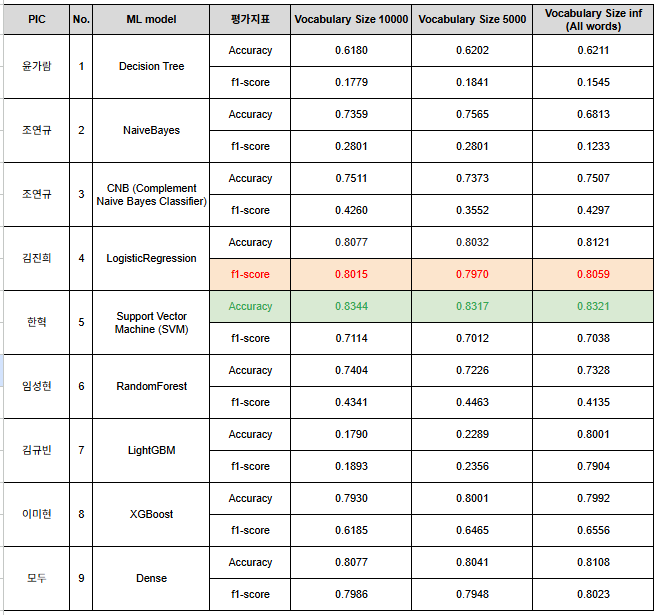

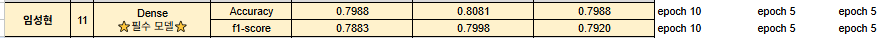